In [99]:
import numpy as np
import pandas as pd
import time

In [100]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [101]:
df = df[['Age','EstimatedSalary','Purchased']]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [102]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [103]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense

In [108]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
X_scaled.shape

(400, 2)

In [111]:
X_train_scaled.shape

(320, 2)

# Batch Gradient Descend

In [112]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train_scaled,y_train,epochs=10,batch_size=320)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - accuracy: 0.2219 - loss: 0.8097
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2469 - loss: 0.8016
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2500 - loss: 0.7959
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2594 - loss: 0.7913
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2656 - loss: 0.7872
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2688 - loss: 0.7835
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2750 - loss: 0.7801
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2812 - loss: 0.7768
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2906 - loss: 0.7737
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2906 - loss: 0.7708
0.9140851497650146


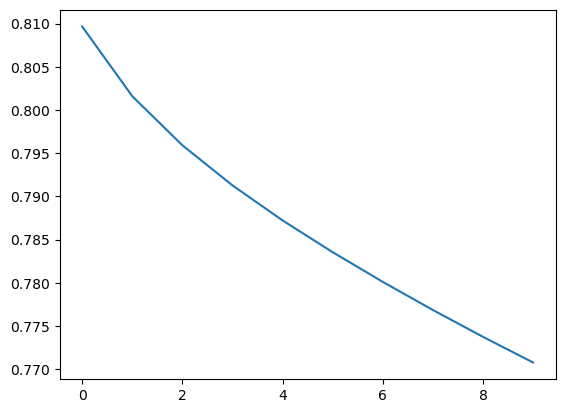

In [113]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# Stochastic Gradient Descend

In [114]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [115]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=1)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.5841 - loss: 0.7032
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.7516 - loss: 0.5311
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8263 - loss: 0.4063
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9369 - loss: 0.3088
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8862 - loss: 0.3121
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8787 - loss: 0.3034
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.8914 - loss: 0.2683
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.9083 - loss: 0.2633
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8861 - loss: 0.2800
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.9104 - loss: 0.2390
2.276684284210205


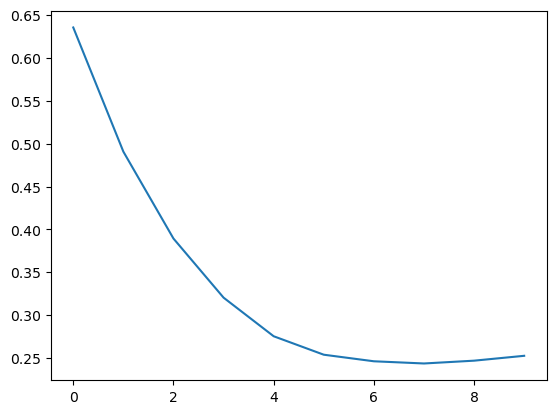

In [116]:
plt.plot(history.history['loss'])